# Clustering with Density Based - NYC collisions dataset

imports and data loading:

In [1]:
from pandas import DataFrame, read_csv
from matplotlib.pyplot import subplots, show
from ds_charts import choose_grid, plot_clusters, plot_line, bar_chart, compute_mse, compute_centroids

data: DataFrame = read_csv('data/pca2_balanced.csv')
data.pop('PERSON_INJURY')
v1 = 0
v2 = 1

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
rows, cols = choose_grid(len(N_CLUSTERS))

## Density based

### EPS - studying the maximum distance impact

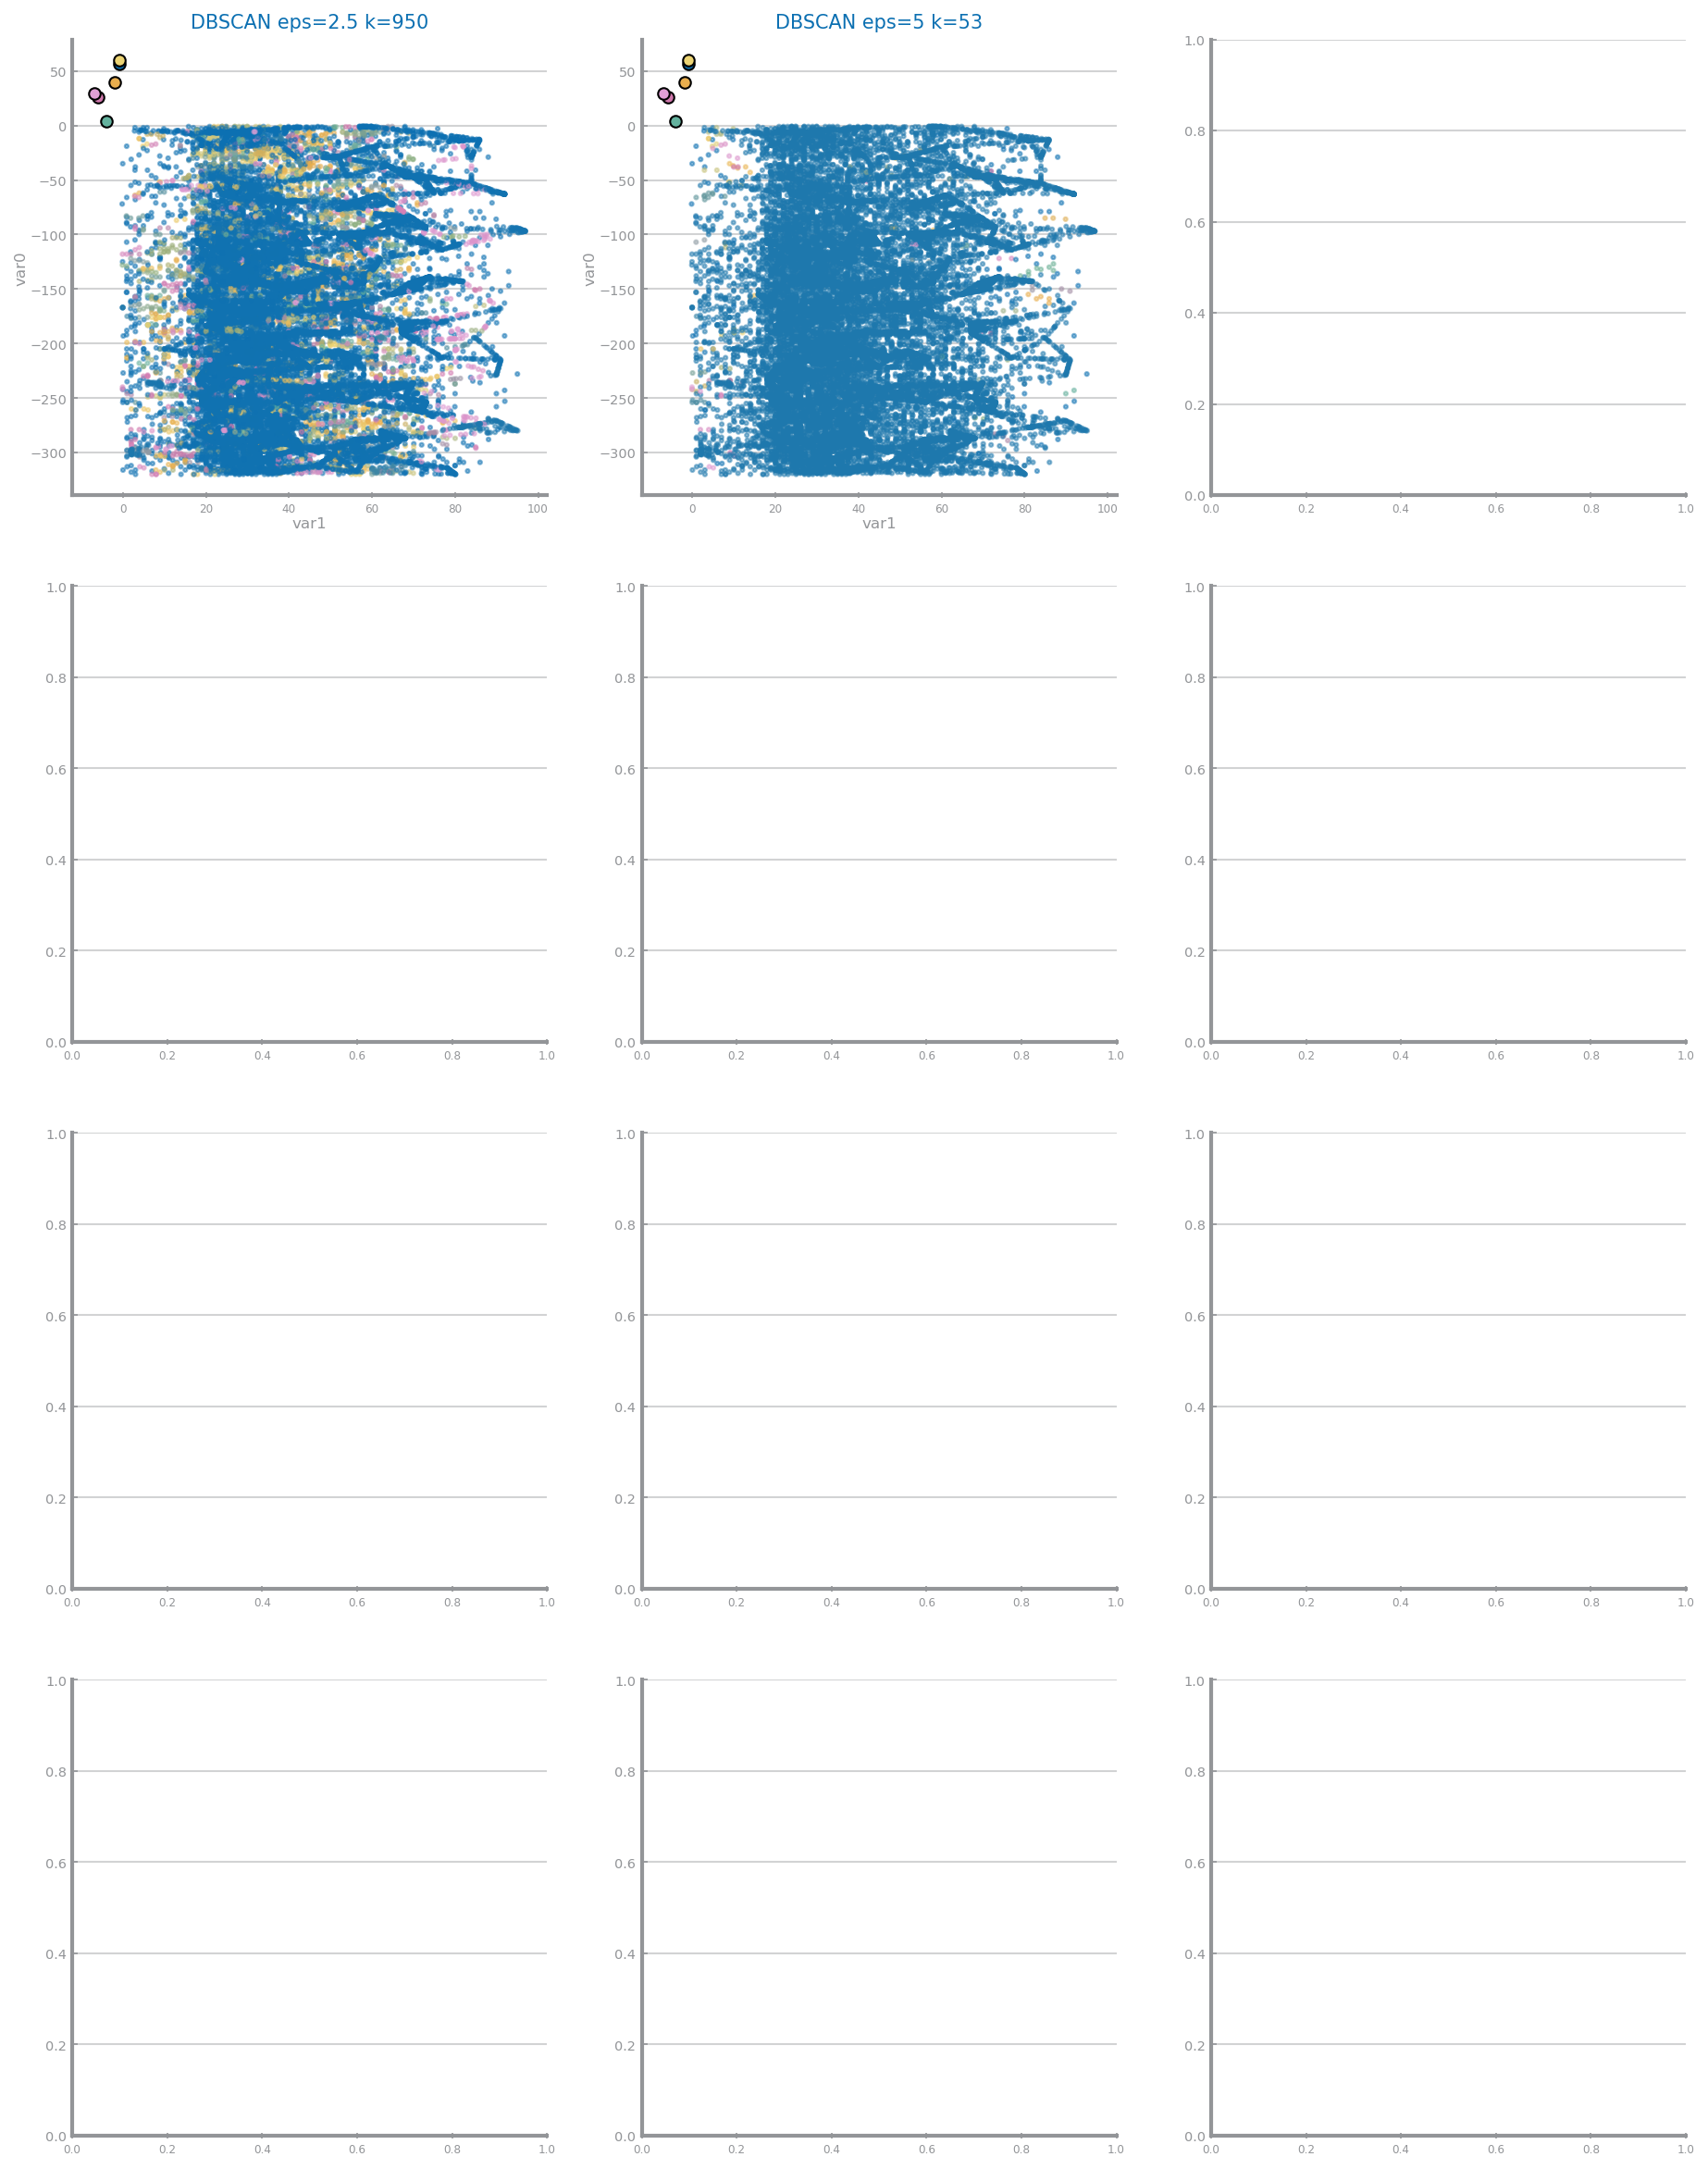

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

EPS = [2.5, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
mse: list = []
sc: list = []
rows, cols = choose_grid(len(EPS))
_, axs = subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(EPS)):
    estimator = DBSCAN(eps=EPS[n], min_samples=2)
    estimator.fit(data)
    labels = estimator.labels_
    k = len(set(labels)) - (1 if -1 in labels else 0)
    if k > 1:
        centers = compute_centroids(data, labels)
        mse.append(compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        plot_clusters(data, v2, v1, labels.astype(float), estimator.components_, k, f'DBSCAN eps={EPS[n]} k={k}', ax=axs[i,j])
        i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    else:
        mse.append(0)
        sc.append(0)
show()

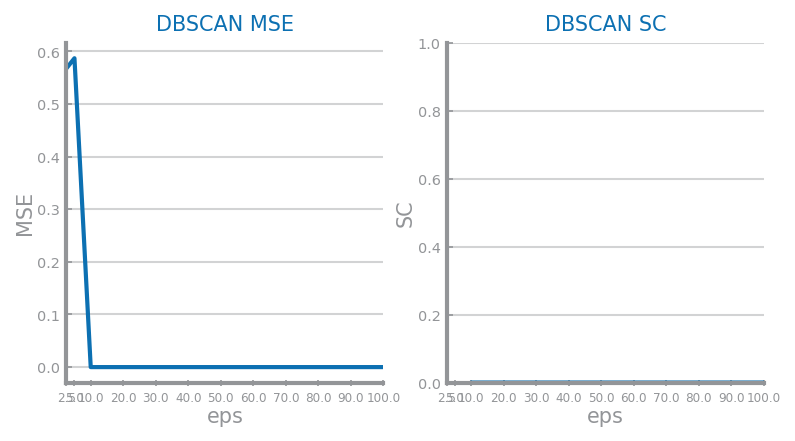

In [3]:
fig, ax = subplots(1, 2, figsize=(6, 3), squeeze=False)
plot_line(EPS, mse, title='DBSCAN MSE', xlabel='eps', ylabel='MSE', ax=ax[0, 0])
plot_line(EPS, sc, title='DBSCAN SC', xlabel='eps', ylabel='SC', ax=ax[0, 1], percentage=True)
show()

### Metric

In [4]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

METRICS = ['euclidean', 'cityblock', 'chebyshev', 'cosine', 'jaccard']
distances = []
for m in METRICS:
    dist = np.mean(np.mean(squareform(pdist(data.values, metric=m))))
    distances.append(dist)

print('AVG distances among records', distances)
distances[0] *= 0.6
distances[1] = 80
distances[2] *= 0.6
distances[3] *= 0.1
distances[4] *= 0.15
print('CHOSEN EPS', distances)

AVG distances among records [105.10595901163835, 127.59292067683558, 101.21345071511494, 0.09114112770673352, 0.9999549542267612]
CHOSEN EPS [63.063575406983006, 80, 60.728070429068964, 0.009114112770673352, 0.14999324313401416]


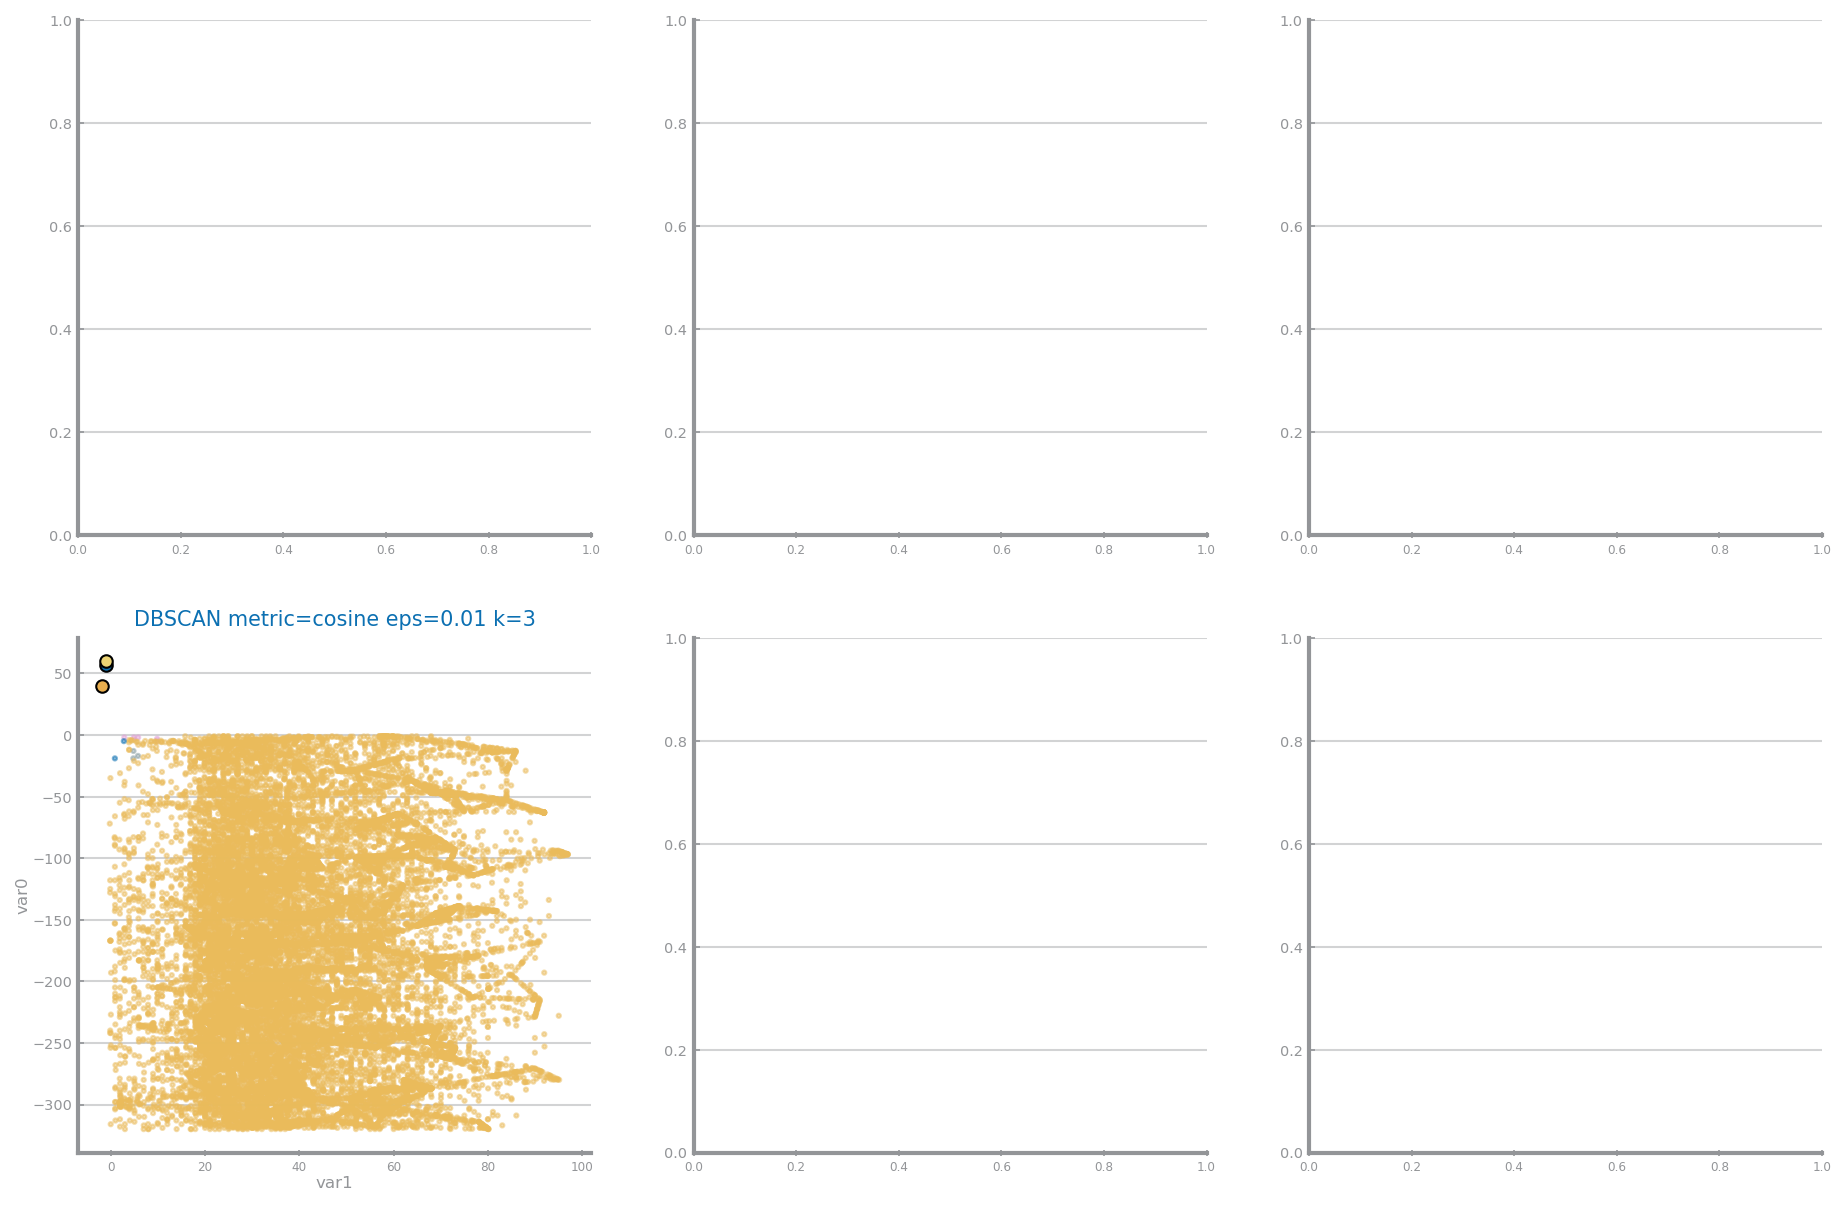

In [5]:
mse: list = []
sc: list = []
rows, cols = choose_grid(len(METRICS))
_, axs = subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(METRICS)):
    estimator = DBSCAN(eps=distances[n], min_samples=2, metric=METRICS[n])
    estimator.fit(data)
    labels = estimator.labels_
    k = len(set(labels)) - (1 if -1 in labels else 0)
    if k > 1:
        centers = compute_centroids(data, labels)
        mse.append(compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        plot_clusters(data, v2, v1, labels.astype(float), estimator.components_, k, f'DBSCAN metric={METRICS[n]} eps={distances[n]:.2f} k={k}', ax=axs[i,j])
    else:
        mse.append(0)
        sc.append(0)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
show()

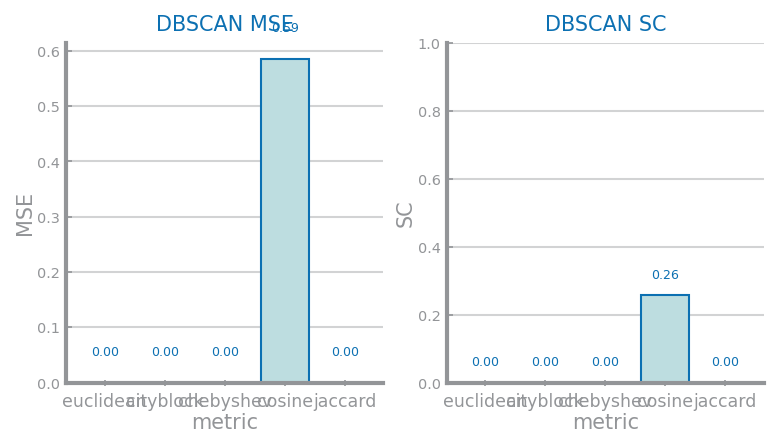

In [6]:
fig, ax = subplots(1, 2, figsize=(6, 3), squeeze=False)
bar_chart(METRICS, mse, title='DBSCAN MSE', xlabel='metric', ylabel='MSE', ax=ax[0, 0])
bar_chart(METRICS, sc, title='DBSCAN SC', xlabel='metric', ylabel='SC', ax=ax[0, 1], percentage=True)
show()